<a href="https://colab.research.google.com/github/kanakala2116/codealpha_tasks/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/5
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1430 - accuracy: 0.9558 - val_loss: 0.0580 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0477 - accuracy: 0.9854 - val_loss: 0.0382 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0236 - accuracy: 0.9929 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0270 - val_accuracy: 0.9911


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 2s 7ms/step - loss: 0.0270 - accuracy: 0.9911
Test accuracy: 0.991100013256073


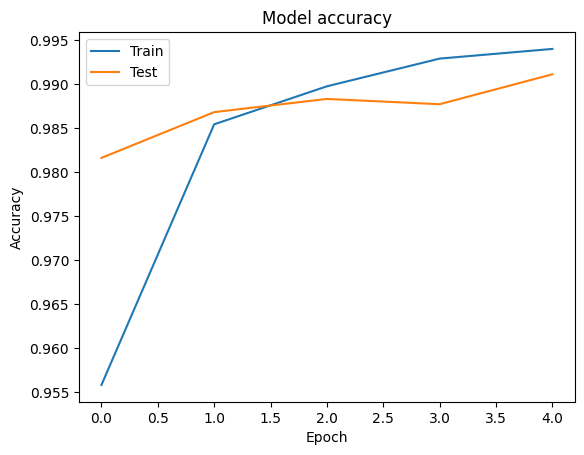

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


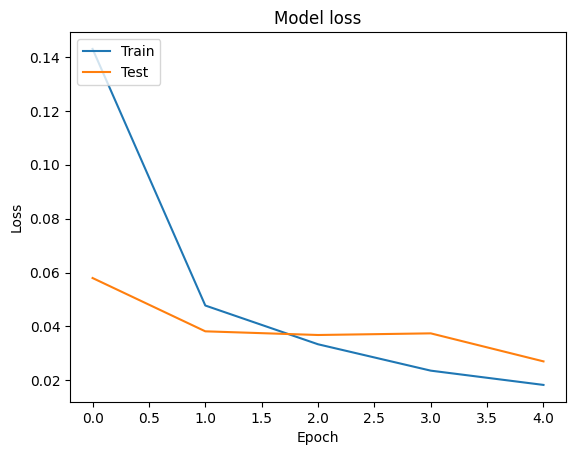

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 [==============================] - 5s 14ms/step


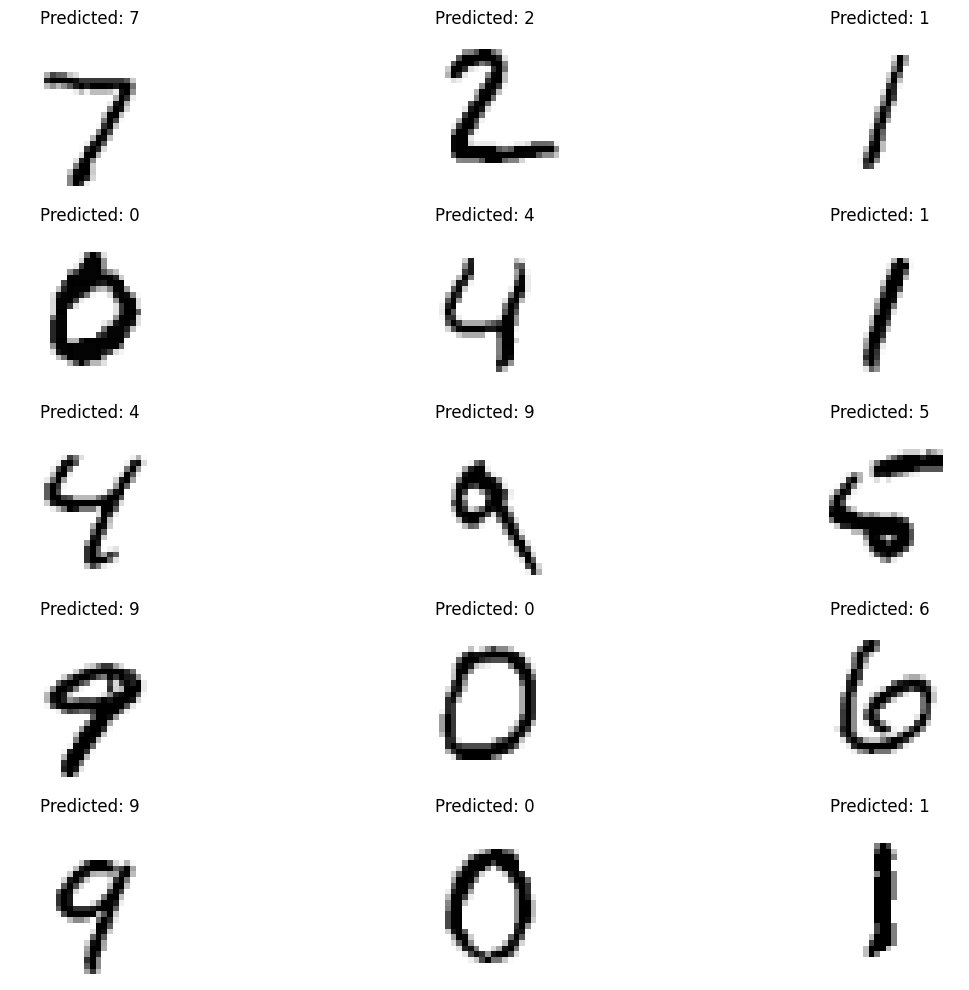

In [ ]:
predictions = model.predict(X_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='binary')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()